In [2]:
#%pip install hipe4ml

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hipe4ml.model_handler import ModelHandler
from hipe4ml.tree_handler import TreeHandler
from hipe4ml.analysis_utils import train_test_generator
from hipe4ml import plot_utils, analysis_utils

In [4]:
dataH = TreeHandler('output_jpsiYuanjing.root','O2rtdielectronall')
# book prompt and nonprompt jpsi from MC samples
# =3 is prompt jpsi and =5 is nonprpmpt jpsi
promptH = dataH.get_subset('fMcDecision==3')
nonpromptH = dataH.get_subset('fMcDecision==5')

In [5]:
train_test_data = train_test_generator([promptH, nonpromptH], [1,0], test_size=0.5, random_state=42)

In [6]:
vars_to_draw = promptH.get_var_names()
vars_to_draw.remove('fMass')
vars_to_draw.remove('fPt')
vars_to_draw.remove('fEta')
vars_to_draw.remove('fPhi')
vars_to_draw.remove('fSign')
vars_to_draw.remove('fFilterMap')
vars_to_draw.remove('fMcDecision')
vars_to_draw.remove('fPt1')
vars_to_draw.remove('fEta1')
vars_to_draw.remove('fPhi1')
vars_to_draw.remove('fITSClusterMap1')
vars_to_draw.remove('fITSChi2NCl1')
vars_to_draw.remove('fTPCNClsCR1')
vars_to_draw.remove('fTPCNClsFound1')
vars_to_draw.remove('fTPCChi2NCl1')
# vars_to_draw.remove('fDcaXY1')
# vars_to_draw.remove('fDcaZ1')
vars_to_draw.remove('fTPCSignal1')
vars_to_draw.remove('fTPCNSigmaEl1')
vars_to_draw.remove('fTPCNSigmaPi1')
vars_to_draw.remove('fTPCNSigmaPr1')
vars_to_draw.remove('fTOFBeta1')
vars_to_draw.remove('fTOFNSigmaEl1')
vars_to_draw.remove('fTOFNSigmaPi1')
vars_to_draw.remove('fTOFNSigmaPr1')
vars_to_draw.remove('fPt2')
vars_to_draw.remove('fEta2')
vars_to_draw.remove('fPhi2')
vars_to_draw.remove('fITSClusterMap2')
vars_to_draw.remove('fITSChi2NCl2')
vars_to_draw.remove('fTPCNClsCR2')
vars_to_draw.remove('fTPCNClsFound2')
vars_to_draw.remove('fTPCChi2NCl2')
# vars_to_draw.remove('fDcaXY2')
# vars_to_draw.remove('fDcaZ2')
vars_to_draw.remove('fTPCSignal2')
vars_to_draw.remove('fTPCNSigmaEl2')
vars_to_draw.remove('fTPCNSigmaPi2')
vars_to_draw.remove('fTPCNSigmaPr2')
vars_to_draw.remove('fTOFBeta2')
vars_to_draw.remove('fTOFNSigmaEl2')
vars_to_draw.remove('fTOFNSigmaPi2')
vars_to_draw.remove('fTOFNSigmaPr2')
# vars_to_draw.remove('fDCAxyzTrk0KF')
# vars_to_draw.remove('fDCAxyzTrk1KF')
# vars_to_draw.remove('fDCAxyzBetweenTrksKF')
# vars_to_draw.remove('fDCAxyTrk0KF')
# vars_to_draw.remove('fDCAxyTrk1KF')
# vars_to_draw.remove('fDCAxyBetweenTrksKF')
# vars_to_draw.remove('fDeviationTrk0KF')
# vars_to_draw.remove('fDeviationTrk1KF')
# vars_to_draw.remove('fDeviationxyTrk0KF')
# vars_to_draw.remove('fDeviationxyTrk1KF')
vars_to_draw.remove('fMassKFGeo')
# vars_to_draw.remove('fChi2OverNDFKFGeo')
# vars_to_draw.remove('fDecayLengthKFGeo')
# vars_to_draw.remove('fDecayLengthOverErrKFGeo')
# vars_to_draw.remove('fDecayLengthXYKFGeo')
# vars_to_draw.remove('fDecayLengthXYOverErrKFGeo')
# vars_to_draw.remove('fPseudoproperDecayTimeKFGeo')
# vars_to_draw.remove('fPseudoproperDecayTimeErrKFGeo')
# vars_to_draw.remove('fCosPAKFGeo')
# vars_to_draw.remove('fPairDCAxyz')
# vars_to_draw.remove('fPairDCAxy')
# vars_to_draw.remove('fDeviationPairKF')
# vars_to_draw.remove('fDeviationxyPairKF')
vars_to_draw.remove('fMassKFGeoTop')
# vars_to_draw.remove('fChi2OverNDFKFGeoTop')

/tmp/ipykernel_23703/3346526205.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


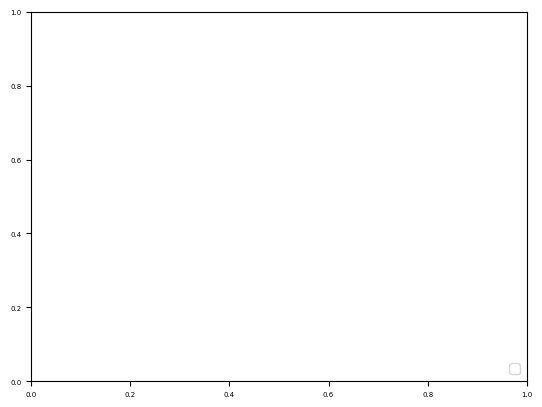

In [7]:
leg_labels = [r'$Non-prompt J/\psi$', r'$Prompt J/\psi$']
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.legend(loc='lower right')

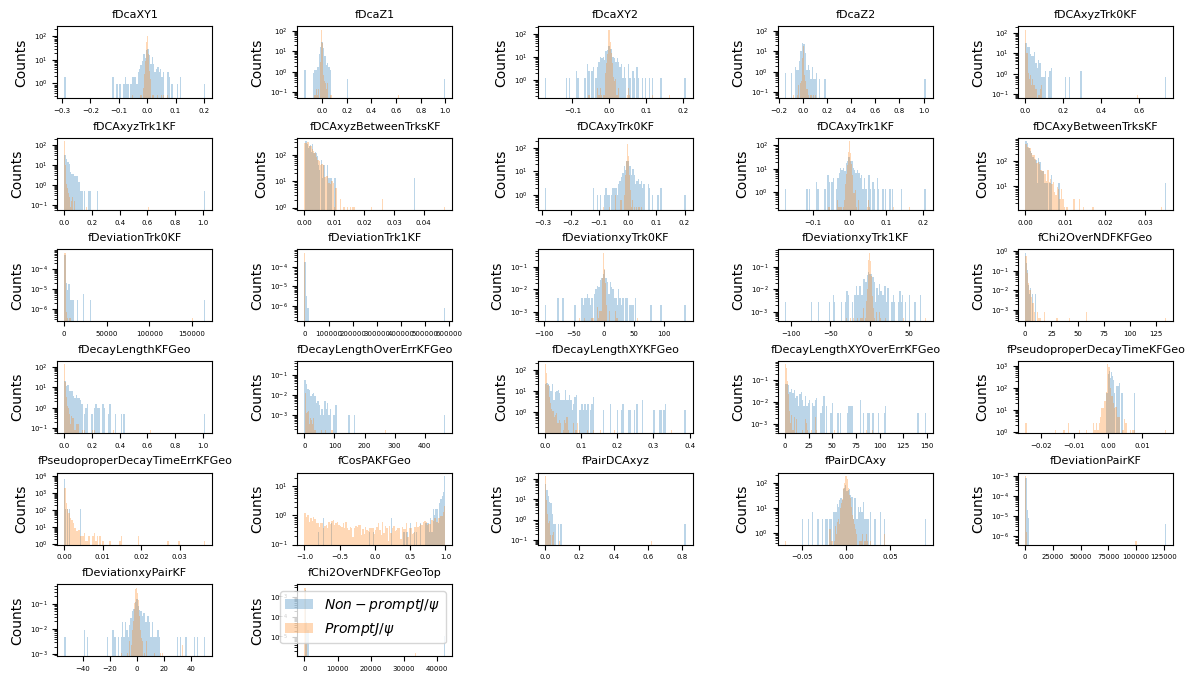

In [8]:
plot_utils.plot_distr([nonpromptH, promptH], vars_to_draw, bins=100, labels=leg_labels, log=True, density=True, figsize=(12, 7), alpha=0.3, grid=False)
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.55, wspace=0.55)
plt.savefig('figs/distribution.pdf')

finish read the data!


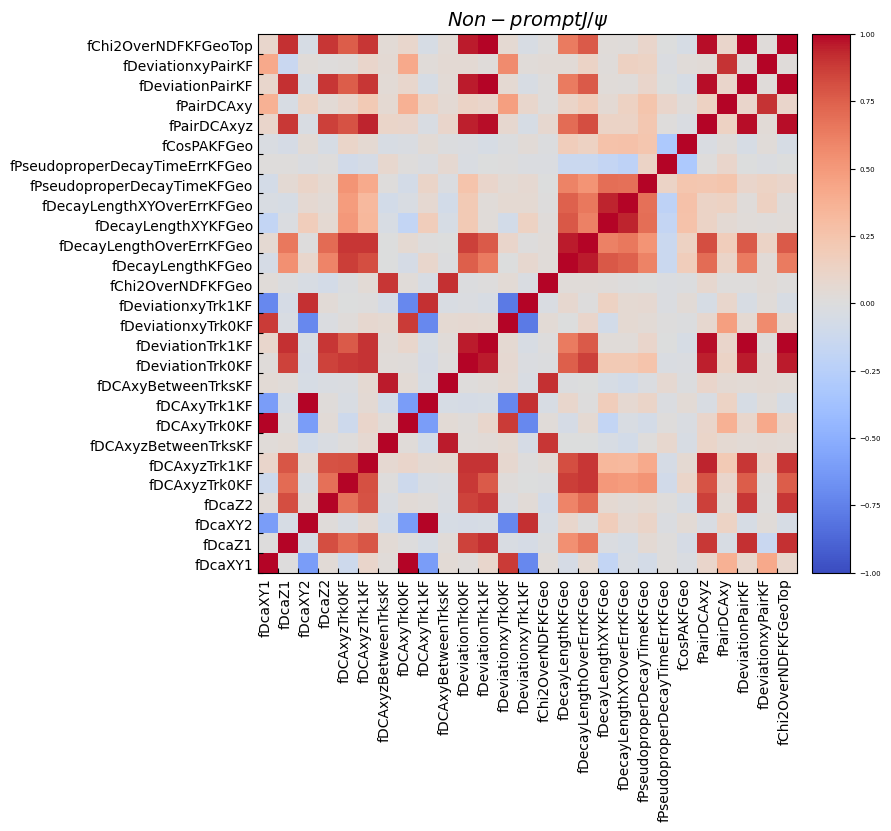

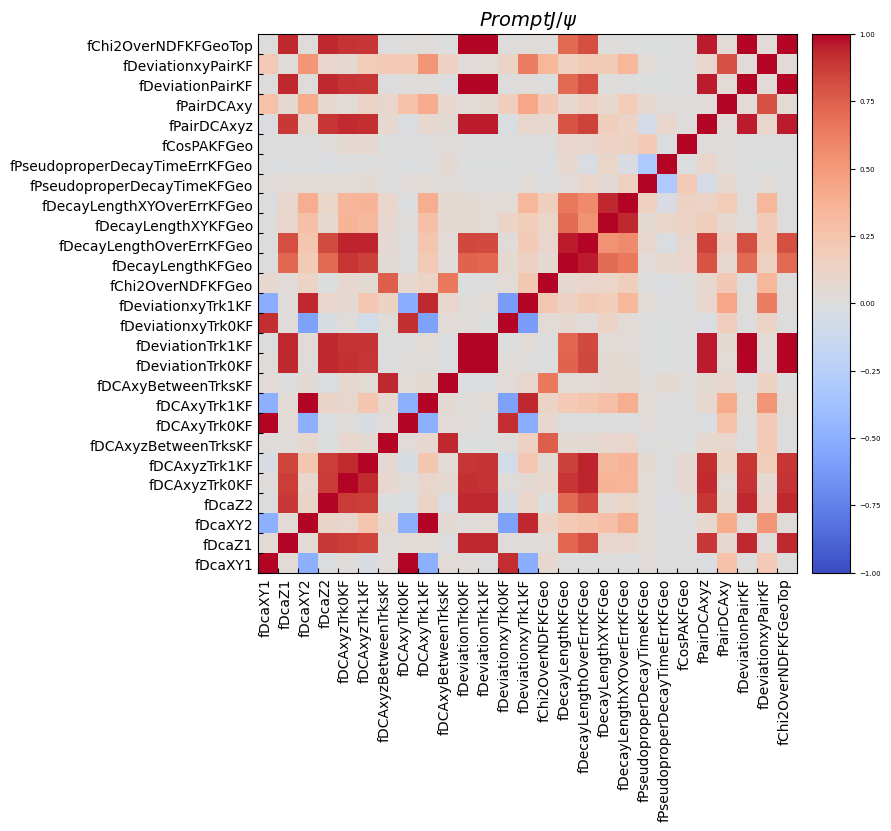

<Figure size 640x480 with 0 Axes>

In [9]:
plot_utils.plot_corr([nonpromptH, promptH], vars_to_draw, leg_labels)
corr1 = plt.figure(2)
corr1.savefig('figs/corr1.pdf')
corr2 = plt.figure(3)
corr1.savefig('figs/corr2.pdf')
print("finish read the data!")

In [10]:
features_for_train = vars_to_draw.copy()
print("features_for_train:", features_for_train)

features_for_train: ['fDcaXY1', 'fDcaZ1', 'fDcaXY2', 'fDcaZ2', 'fDCAxyzTrk0KF', 'fDCAxyzTrk1KF', 'fDCAxyzBetweenTrksKF', 'fDCAxyTrk0KF', 'fDCAxyTrk1KF', 'fDCAxyBetweenTrksKF', 'fDeviationTrk0KF', 'fDeviationTrk1KF', 'fDeviationxyTrk0KF', 'fDeviationxyTrk1KF', 'fChi2OverNDFKFGeo', 'fDecayLengthKFGeo', 'fDecayLengthOverErrKFGeo', 'fDecayLengthXYKFGeo', 'fDecayLengthXYOverErrKFGeo', 'fPseudoproperDecayTimeKFGeo', 'fPseudoproperDecayTimeErrKFGeo', 'fCosPAKFGeo', 'fPairDCAxyz', 'fPairDCAxy', 'fDeviationPairKF', 'fDeviationxyPairKF', 'fChi2OverNDFKFGeoTop']


In [11]:
print("test")
model_clf = xgb.XGBClassifier()
model_hdl = ModelHandler(model_clf, features_for_train)
#  run cross-validation trials and pick the best hyperparameters. "n_jobs=-1" means use all available CPU cores
hyper_pars_ranges = {'n_estimators': (200, 1000), 'max_depth': (
    2, 4), 'learning_rate': (0.01, 0.1)}
# default: model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=120,
                                # n_jobs=-1, n_trials=100, direction='maximize')
print("Starting parameters optmization with Optuna")
model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=120,
                                n_jobs=-1, n_trials=3, direction='maximize')
print("Parameters optimization with Optuna finished")
#model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=5,
#                                n_jobs=1, n_trials=3, direction='maximize')

[I 2025-08-11 17:21:45,228] A new study created in memory with name: no-name-bec5413f-b5c4-4e55-bd1a-7b38ea5d66f2


test
Starting parameters optmization with Optuna


/home/ferrandi/alice/Hipe4MLenv/lib/python3.9/site-packages/hipe4ml/model_handler.py:389: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params[key] = trial.suggest_uniform(
/home/ferrandi/alice/Hipe4MLenv/lib/python3.9/site-packages/hipe4ml/model_handler.py:389: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params[key] = trial.suggest_uniform(
[I 2025-08-11 17:21:59,941] Trial 1 finished with value: 0.9383484671113538 and parameters: {'n_estimators': 585, 'max_depth': 2, 'learning_rate': 0.09471668004873851}. Best is trial 1 with value: 0.9383484671113538.
[I 2025-08-11 17:22:01,338] Trial 2 finished with value: 0.9412439107284468 and parameters: {'n_estimators': 660, 'max_depth': 2, 'learning_rate': 0.04

Number of finished trials: 3
Best trial:
Value: 0.9412439107284468
Params: 
    n_estimators: 660
    max_depth: 2
    learning_rate: 0.04037233819858516
Parameters optimization with Optuna finished


In [12]:
model_hdl.train_test_model(train_test_data)

Training xgboost model for classification
Number of detected classes: 2
Training the model: ...
Training the model: Done!
Testing the model: ...
ROC_AUC_score: 0.946471
Testing the model: Done!


In [13]:
y_pred_train = model_hdl.predict(train_test_data[0], False)
y_pred_test = model_hdl.predict(train_test_data[2], False)

In [14]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams["figure.figsize"] = (20, 15)

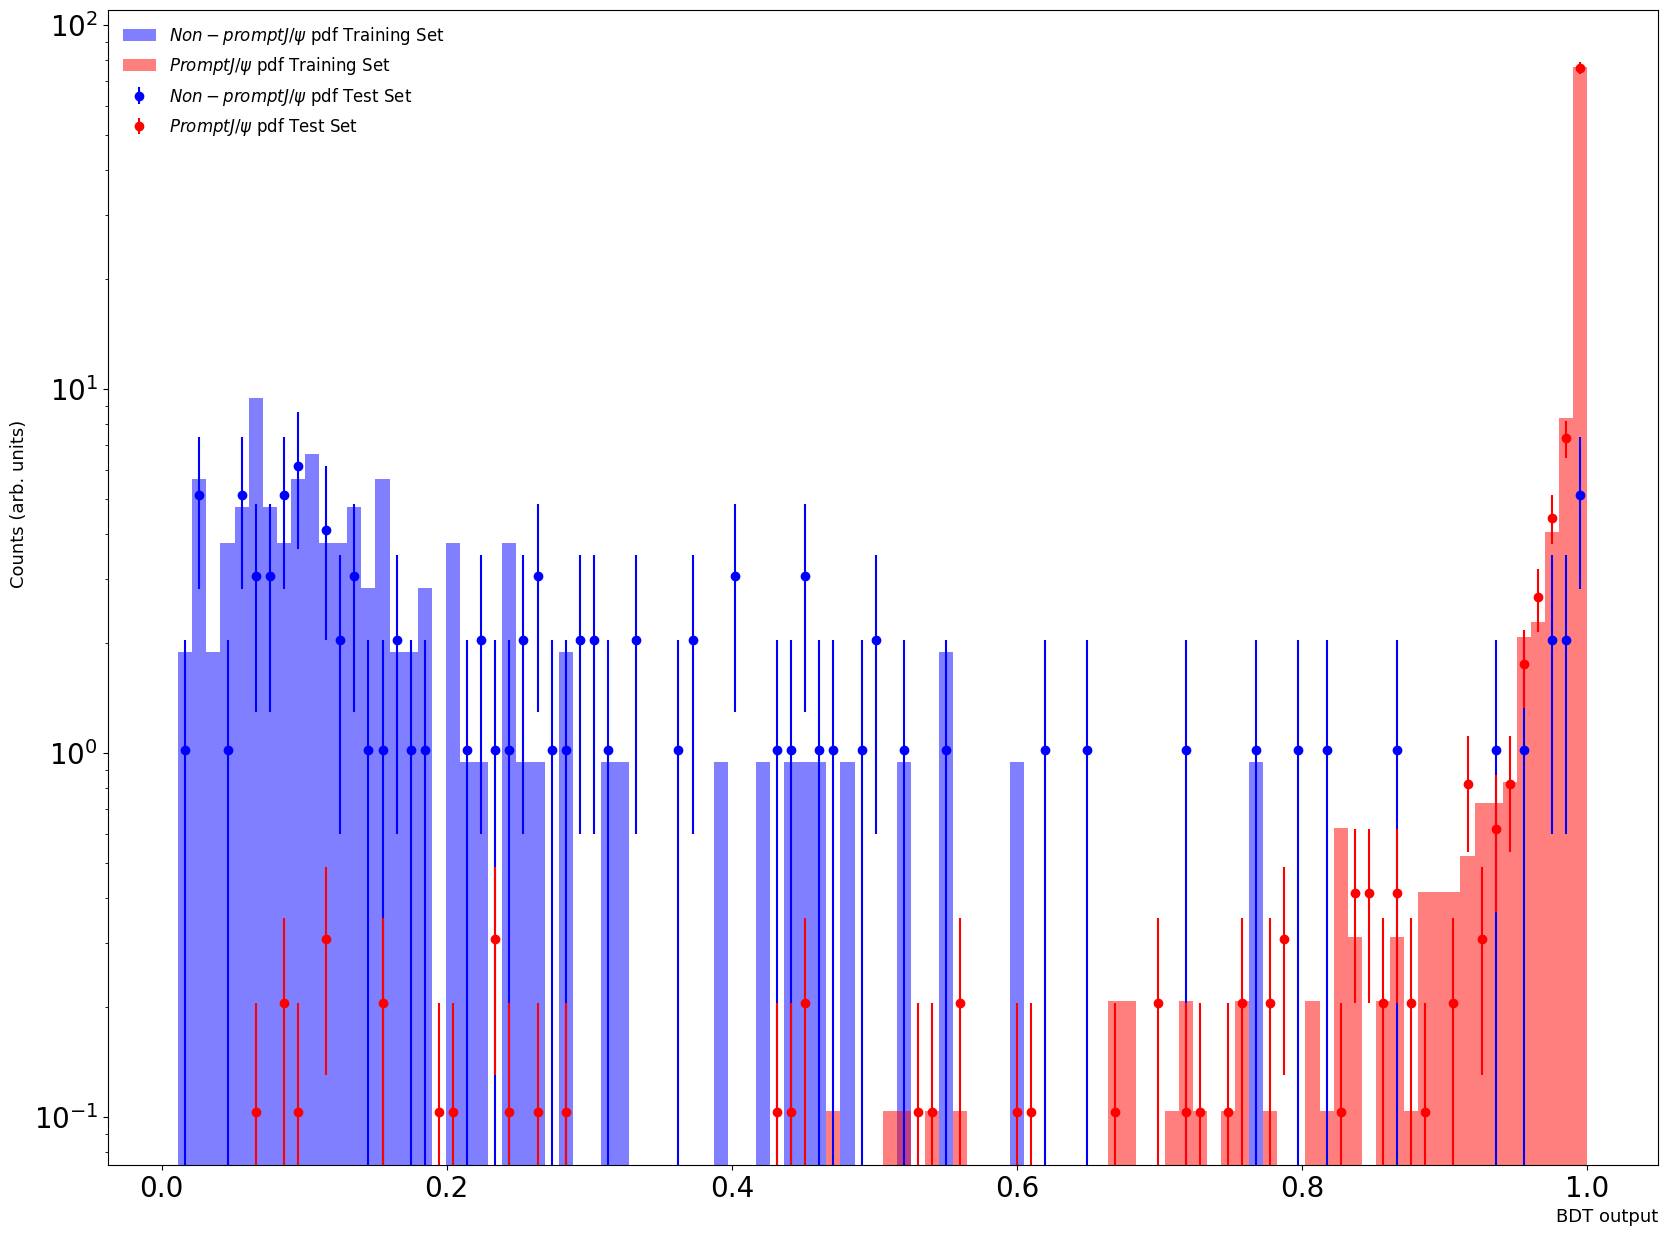

In [15]:
ml_out_fig = plot_utils.plot_output_train_test(model_hdl, train_test_data, 100,
                                               False, leg_labels, True, density=True)
plt.savefig('figs/ml_out_fig.pdf')

In [ ]:
roc_train_test_fig = plot_utils.plot_roc_train_test(train_test_data[3], y_pred_test,
                                                    train_test_data[1], y_pred_train, None, leg_labels)
plt.savefig('figs/roc.pdf');
roc_train_test_fig.savefig('figs/teste.pdf')

: 

finish training


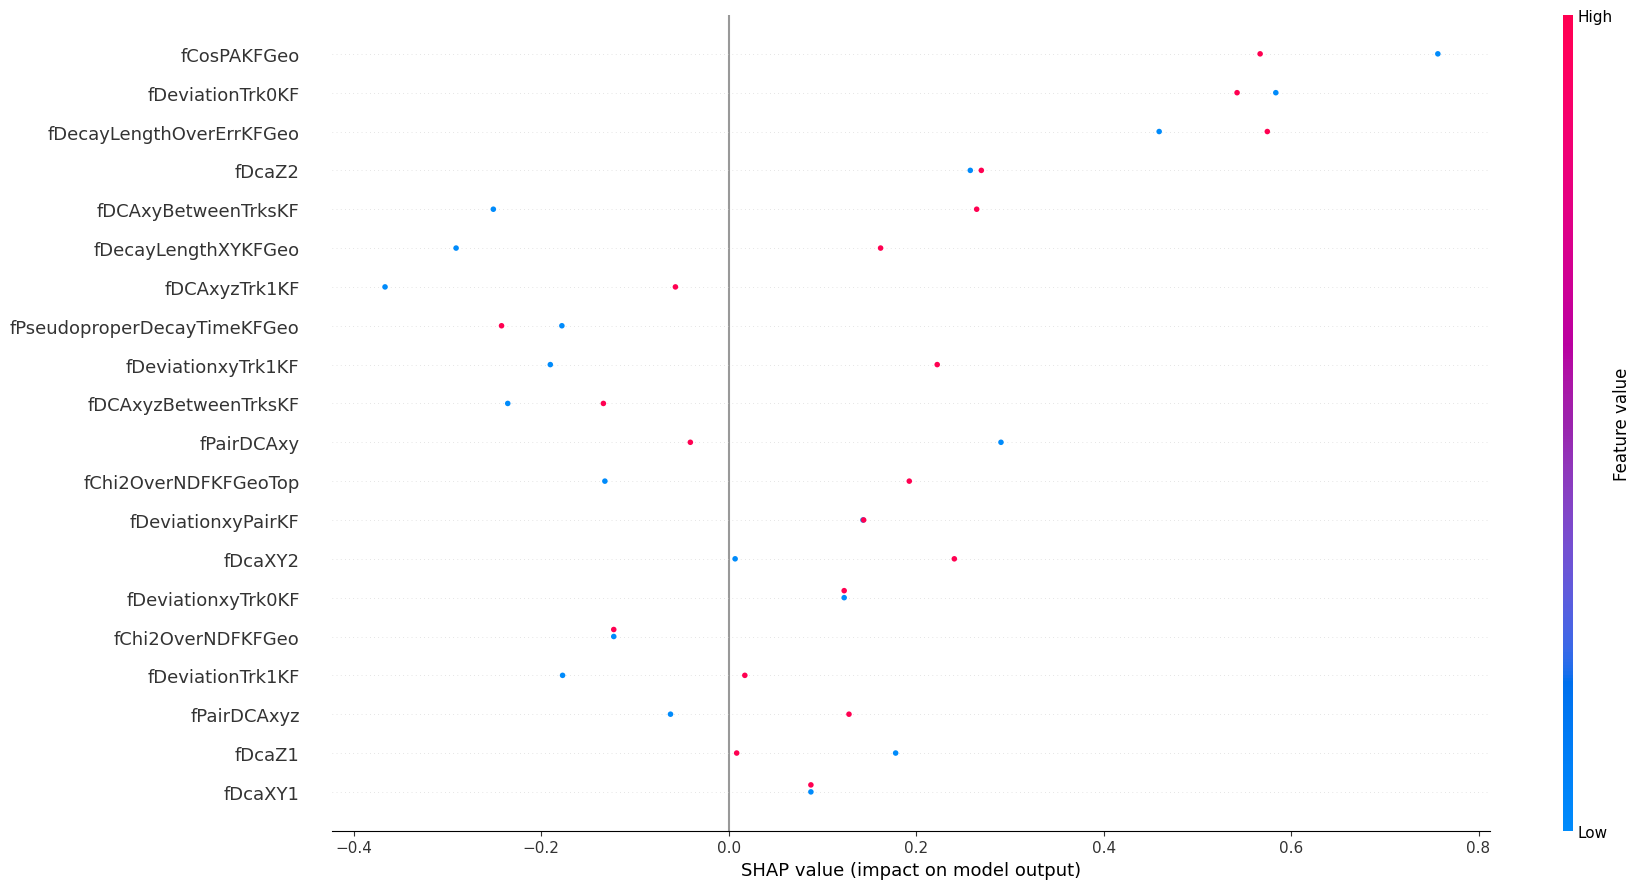

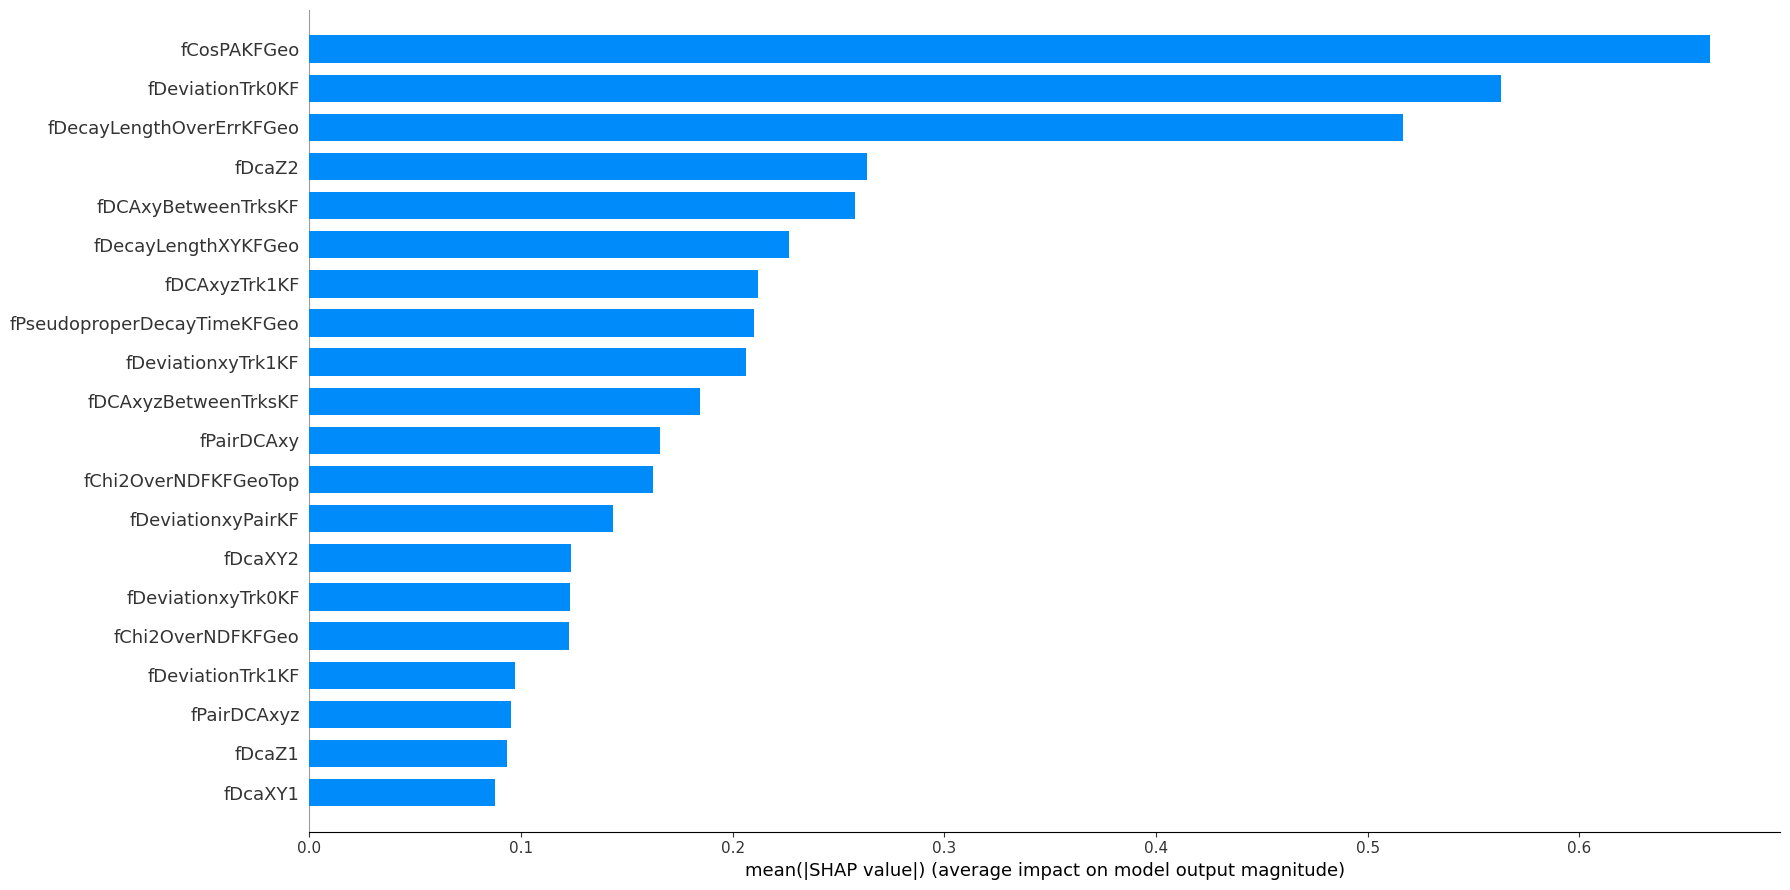

In [17]:
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

features_importance = plot_utils.plot_feature_imp(train_test_data, leg_labels, model_hdl, features_for_train,10000, 1)
plt.savefig("figs/features_importance.pdf")
print("finish training")

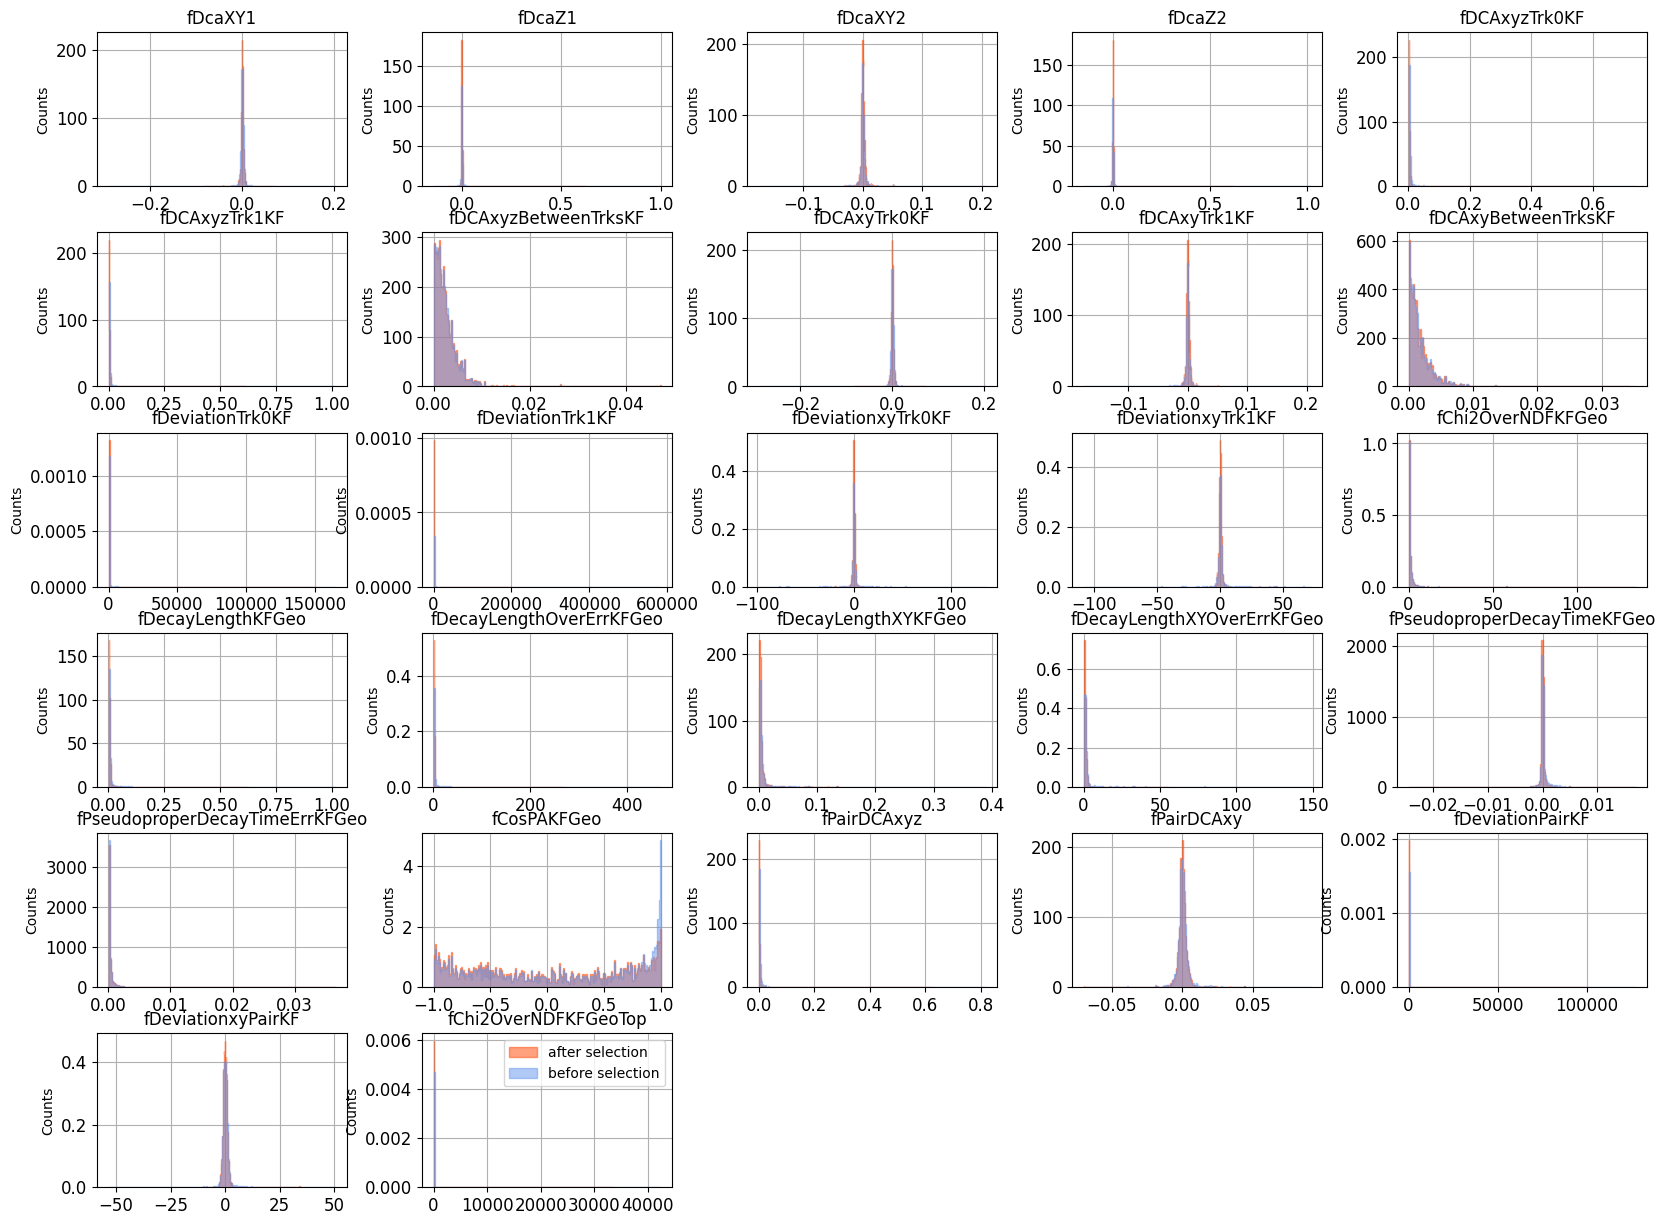

In [18]:
dataH.apply_model_handler(model_hdl, False)

selected_data_hndl = dataH.get_subset('model_output>0.80')
labels_list = ["after selection","before selection"]
colors_list = ['orangered', 'cornflowerblue']
plot_utils.plot_distr([selected_data_hndl, dataH], column=vars_to_draw.copy(), bins=200, labels=labels_list, colors=colors_list, density=True,fill=True, histtype='step', alpha=0.5)
ax = plt.gca()
ax.set_xlabel(r'm(e^{+}e^{-}) (GeV/$c^2$)')
ax.margins(x=0)
ax.xaxis.set_label_coords(0.9, -0.075)
plt.savefig("figs/distributions_data.pdf")

In [19]:
# PRECISION_RECALL_PLOT = plot_utils.plot_precision_recall(DATA[3], Y_PRED)
# BDT_EFFICIENCY_PLOT = plot_utils.plot_bdt_eff(THRESHOLD, EFFICIENCY)

# plt.show()
print("finish training")

finish training
